# **Data Exploration**

The data comes from numpy arrays where each row represents a signal and the columns are the components of each n time for the specific signal.


Libraries

In [ ]:


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.fft import fft, fftfreq
from sklearn.manifold import TSNE
import kmapper as km
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from scipy.stats import mode
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split

from scipy.signal import find_peaks, welch, cwt, ricker
from scipy.ndimage import gaussian_filter1d
from scipy.stats import entropy, skew, kurtosis

np.random.seed(42) # for reproducibility

In [ ]:
# Import the data from a numpy file
datos_np = np.load('data/noisy_signals.npy') #test data
labels = np.load('data/labels.npy')


# Transformed data to a dataframe
datos = pd.DataFrame(datos_np)
datos_no_labels = pd.DataFrame(datos_np)

# Add labels
datos["label"] = labels



## Data description

In [ ]:
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------\n")
print("Data dimension:")
print(datos.shape)

print("\n------------------------------------------------------------------------------------------------------------------------------------------------------------\n")
print("Data info:")
print(datos.info())

print("\n------------------------------------------------------------------------------------------------------------------------------------------------------------\n")
print("Data stats:")
display(datos.describe())

print("\n------------------------------------------------------------------------------------------------------------------------------------------------------------\n")
print("Top 5 columns with the most standard deviation:")
print(datos.std().sort_values(ascending=False).head())

print("\n------------------------------------------------------------------------------------------------------------------------------------------------------------\n")
print("Top 5 columns with the most standard deviation:")
print(datos.std().sort_values(ascending=True).head())

print("\n------------------------------------------------------------------------------------------------------------------------------------------------------------\n")
print("Amount of null data:")
print(datos.isnull().sum().sum())

print("\n------------------------------------------------------------------------------------------------------------------------------------------------------------\n")
print("Duplicate data:")
print(datos.duplicated().sum())

print("\n------------------------------------------------------------------------------------------------------------------------------------------------------------\n")
print("Labels:")
print(datos["label"].value_counts())




--------------------------------------------------------------------------------------------------------------------------------------------------------------

Dimensiones de los datos:
(1500, 8693)

------------------------------------------------------------------------------------------------------------------------------------------------------------

Información de los datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Columns: 8693 entries, 0 to label
dtypes: float64(8693)
memory usage: 99.5 MB
None

------------------------------------------------------------------------------------------------------------------------------------------------------------

Estadísticas de los datos:


,0,1,2,3,4,5,6,7,8,9,...,8683,8684,8685,8686,8687,8688,8689,8690,8691,label
count,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,...,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1500.000000
mean,2.009262e-21,-4.218938e-21,4.334093e-21,4.836054e-21,-3.215206e-21,-3.324314e-21,1.918122e-21,-2.454982e-21,6.709850e-22,-4.585800e-21,...,7.286925e-21,1.204542e-21,-4.779475e-23,-2.076121e-21,-4.265610e-21,-1.995251e-21,4.258386e-21,2.396511e-22,-5.855935e-22,0.504667
std,1.496012e-19,1.538785e-19,1.568332e-19,1.531178e-19,1.556027e-19,1.554493e-19,1.530054e-19,1.503962e-19,1.576996e-19,1.538733e-19,...,1.500122e-19,1.533894e-19,1.516240e-19,1.511471e-19,1.572122e-19,1.548840e-19,1.561272e-19,1.521179e-19,1.502771e-19,0.500145
min,-6.065871e-19,-5.026276e-19,-5.319143e-19,-5.914701e-19,-4.145773e-19,-5.171701e-19,-5.217060e-19,-4.655302e-19,-5.172842e-19,-4.787539e-19,...,-4.231573e-19,-5.079715e-19,-4.757180e-19,-4.625472e-19,-4.923643e-19,-4.629373e-19,-5.533992e-19,-5.258504e-19,-4.598247e-19,0.000000
25%,-1.028030e-19,-1.115172e-19,-9.467731e-20,-9.188956e-20,-1.045887e-19,-1.091962e-19,-1.045534e-19,-1.011143e-19,-1.016352e-19,-1.079072e-19,...,-9.202615e-20,-9.710208e-20,-1.002880e-19,-1.005487e-19,-1.042543e-19,-1.094036e-19,-9.518463e-20,-1.053559e-19,-1.027314e-19,0.000000
50%,6.207500e-21,-2.192344e-21,6.535282e-21,2.426144e-21,-3.100639e-21,-4.114296e-21,7.310419e-21,-3.300293e-21,-3.289594e-21,-5.252725e-21,...,2.639817e-21,-2.183247e-22,-1.360369e-21,-4.578594e-21,-1.996440e-21,-3.777131e-21,4.909093e-21,3.525468e-21,2.391764e-21,1.000000
75%,1.046340e-19,9.657425e-20,1.114678e-19,1.031879e-19,9.680712e-20,1.066091e-19,1.030609e-19,1.012570e-19,1.046092e-19,9.866197e-20,...,1.032003e-19,1.050763e-19,1.061863e-19,9.166708e-20,1.017439e-19,1.088070e-19,1.129692e-19,1.046626e-19,1.017969e-19,1.000000
max,5.272246e-19,5.449695e-19,5.186770e-19,4.605615e-19,4.967750e-19,4.604081e-19,5.003736e-19,6.389992e-19,4.689056e-19,4.674026e-19,...,4.732446e-19,5.568938e-19,4.854608e-19,5.089317e-19,5.005689e-19,5.217784e-19,5.622331e-19,4.872878e-19,6.954744e-19,1.000000



------------------------------------------------------------------------------------------------------------------------------------------------------------

Top 5 columnas con mayor desviación estándar:
label    5.001450e-01
3487     1.738377e-19
3523     1.727687e-19
3067     1.722823e-19
3631     1.720230e-19
dtype: float64

------------------------------------------------------------------------------------------------------------------------------------------------------------

Top 5 columnas con menor desviación estándar:
6462    1.449848e-19
403     1.453262e-19
8122    1.453571e-19
6725    1.455332e-19
5848    1.457082e-19
dtype: float64

------------------------------------------------------------------------------------------------------------------------------------------------------------

Cantidad de datos nulos:
0

------------------------------------------------------------------------------------------------------------------------------------------------------------



In [ ]:
print("\n------------------------------------------------------------------------------------------------------------------------------------------------------------\n")
print("First five signals:")
display(datos.head())


------------------------------------------------------------------------------------------------------------------------------------------------------------

Primeras 5 filas de los datos:


,0,1,2,3,4,5,6,7,8,9,...,8683,8684,8685,8686,8687,8688,8689,8690,8691,label
0,8.682387e-20,1.563560e-20,2.382502e-20,1.084533e-19,-6.738138e-20,4.588471e-20,-1.992157e-19,2.268602e-19,1.791518e-19,5.120889e-20,...,9.709601e-20,-2.098797e-19,-5.764546e-20,-2.321853e-19,-2.443270e-19,-2.219581e-20,1.419674e-19,4.466733e-20,1.287828e-19,1.0
1,-2.017841e-19,1.595580e-19,-4.035318e-19,9.102487e-20,-1.843170e-19,-4.799557e-20,-4.548237e-19,2.019844e-19,-3.112977e-20,1.136715e-19,...,1.016061e-19,2.527283e-19,-2.933816e-20,2.662413e-20,-3.652252e-19,6.160397e-20,-8.632763e-20,-8.948841e-20,5.061862e-20,1.0
2,-6.537586e-20,4.291750e-21,-7.014886e-20,1.101243e-20,-2.728926e-21,-8.473640e-20,-5.851899e-20,7.662599e-20,-2.271305e-19,-2.285356e-19,...,7.382584e-20,-1.033850e-19,-3.191731e-19,-7.954873e-20,-3.187983e-21,1.336160e-19,-4.770400e-20,8.304426e-20,-2.276264e-19,0.0
3,-2.389988e-19,-1.630314e-19,-3.415376e-20,-1.455836e-20,-2.251815e-19,-1.044709e-19,-1.373373e-19,5.714164e-20,1.122493e-19,5.164979e-21,...,-3.399995e-20,-3.757968e-20,1.317056e-19,-5.003355e-20,8.585062e-20,-2.722846e-19,-1.701624e-19,8.198759e-20,1.238731e-20,1.0
4,-2.751687e-19,2.136702e-20,1.393542e-19,-2.567207e-21,-1.016103e-19,1.706020e-19,1.958549e-19,2.392395e-19,1.145724e-21,-6.552051e-21,...,-4.502616e-20,-4.210193e-20,9.641779e-20,-1.668352e-19,-4.907861e-19,-1.398973e-19,-1.357918e-19,8.609719e-20,-1.186834e-19,1.0


### Outliers




------------------------------------------------------------------------------------------------------------------------------------------------------------

Columnas con mayor cantidad de outliers:
3868    10
981      9
4466     9
4905     9
5197     8
dtype: int64


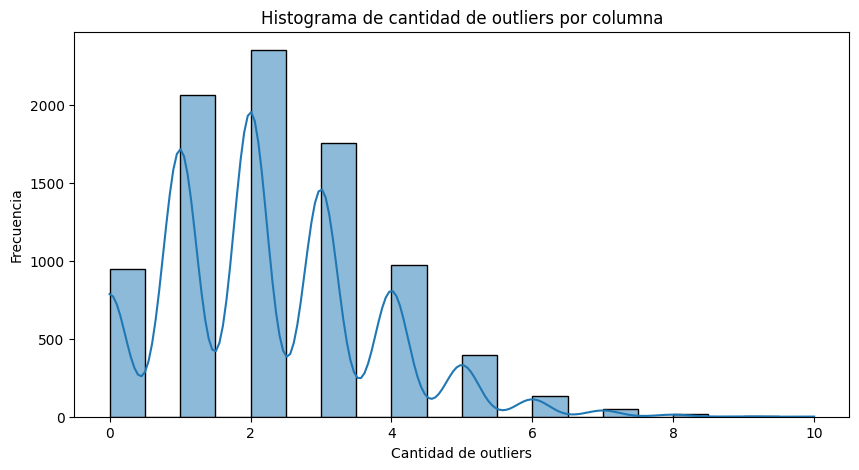

In [100]:
print("\n------------------------------------------------------------------------------------------------------------------------------------------------------------\n")
print("Columnas con mayor cantidad de outliers:")
outliers = (datos > datos.mean() + 3*datos.std()).sum()
print(outliers.sort_values(ascending=False)[:5])


# Histograma para ver la cantidad de outliers
plt.figure(figsize=(10, 5))
sns.histplot(outliers, bins=20, kde=True)
plt.title('Histograma de cantidad de outliers por columna')
plt.xlabel('Cantidad de outliers')
plt.ylabel('Frecuencia')
plt.show()



### Signal visualization

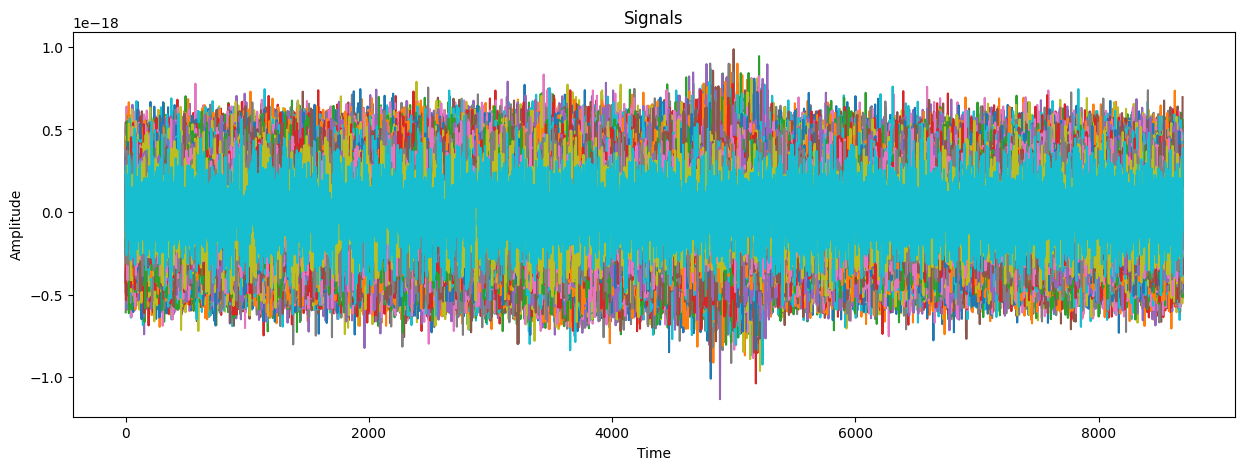

In [101]:
# Plot signals

no_labels = datos.drop(axis=1, labels=['label'])

plt.figure(figsize=(15, 5))
for i in range(len(no_labels)):
    plt.plot(no_labels.iloc[i], label=f'Signal {i+1}')
plt.title('Signals')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()


We observe that the amplitudes stay in a range of [-1,1], so data normalization is not necessary

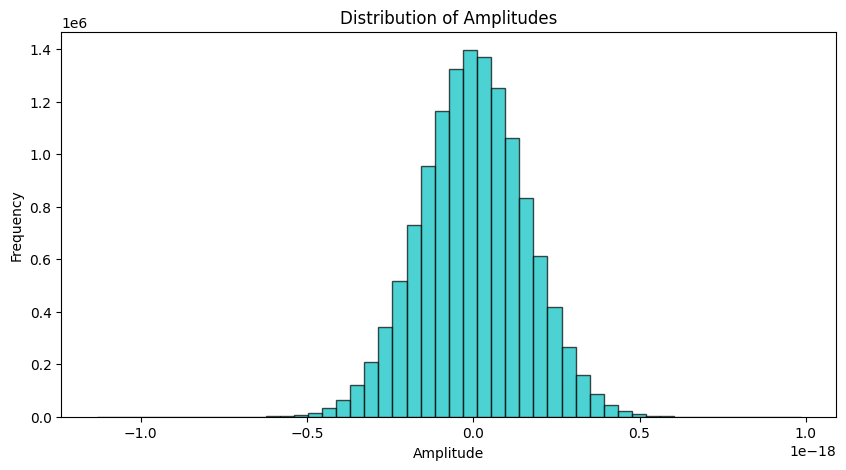

In [102]:
# Plot histogram of the amplitudes
plt.figure(figsize=(10, 5))
plt.hist(no_labels.values.flatten(), bins=50, color='c', edgecolor='k', alpha=0.7)
plt.title('Distribution of Amplitudes')
plt.xlabel('Amplitude')
plt.ylabel('Frequency')
plt.show()


In [103]:
"""
# Compute the correlation matrix
corr_matrix = datos.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Time Components')
plt.show()
"""


"\n# Compute the correlation matrix\ncorr_matrix = datos.corr()\n\n# Plot the heatmap\nplt.figure(figsize=(12, 10))\nsns.heatmap(corr_matrix, annot=False, cmap='coolwarm')\nplt.title('Correlation Matrix of Time Components')\nplt.show()\n"

### Fourier Series

By doing the fourier series of the signals, we identified two types of signals. Some signals have peaks at frequencies close to 0, while others are 'uniform' across the frequency spectrum. This could be an indication of a characteristic that distinguishes noise from signal.

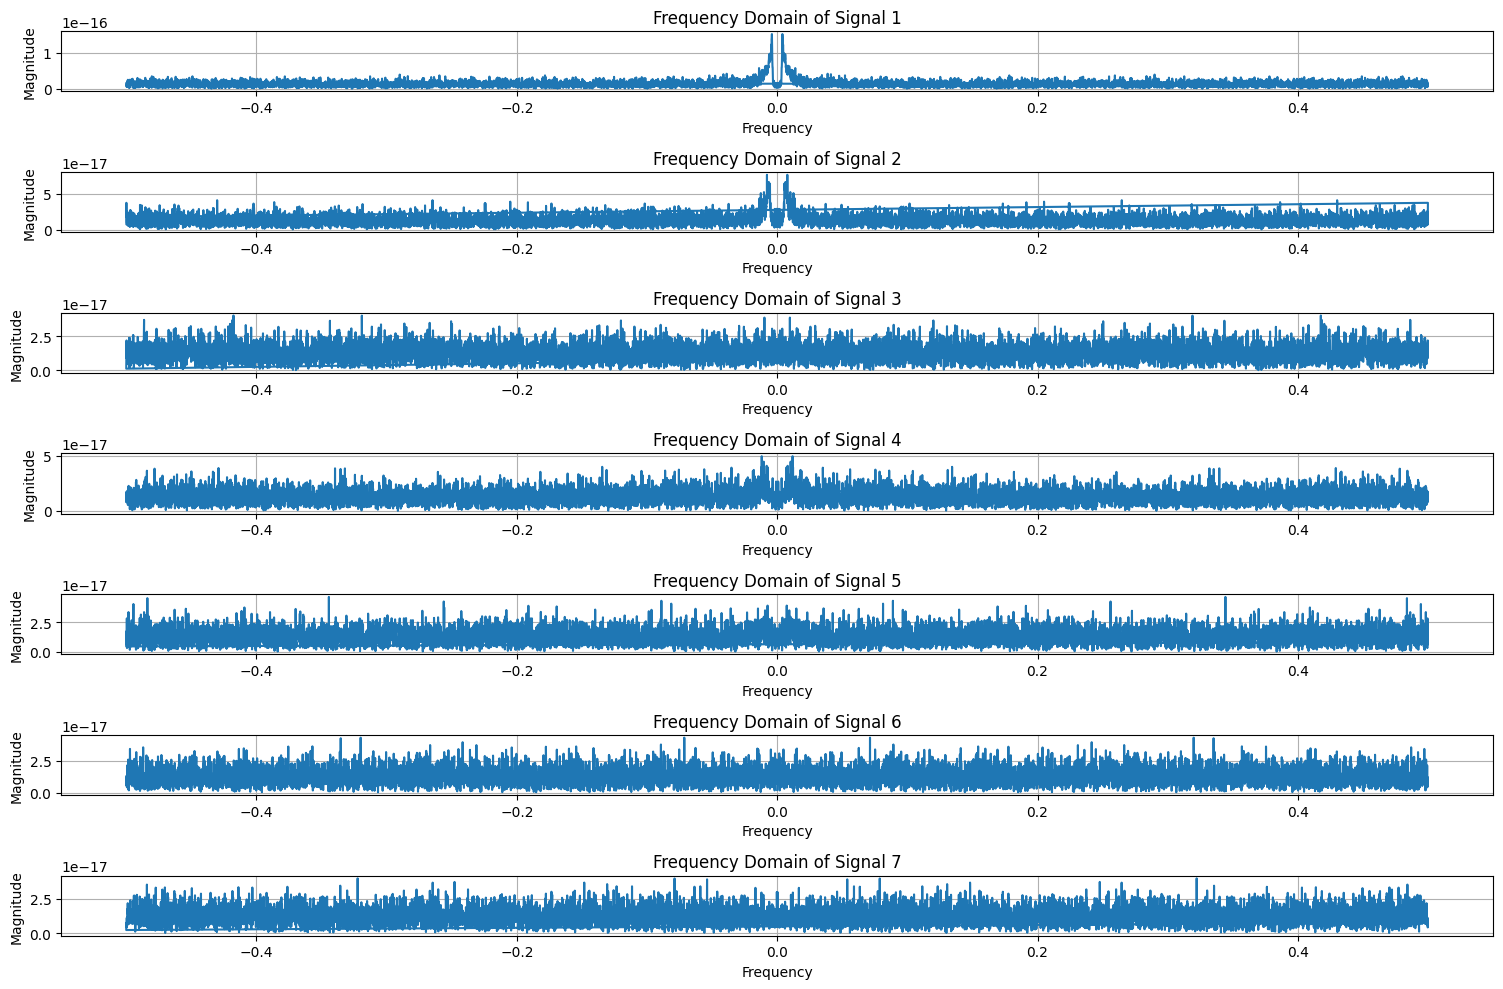

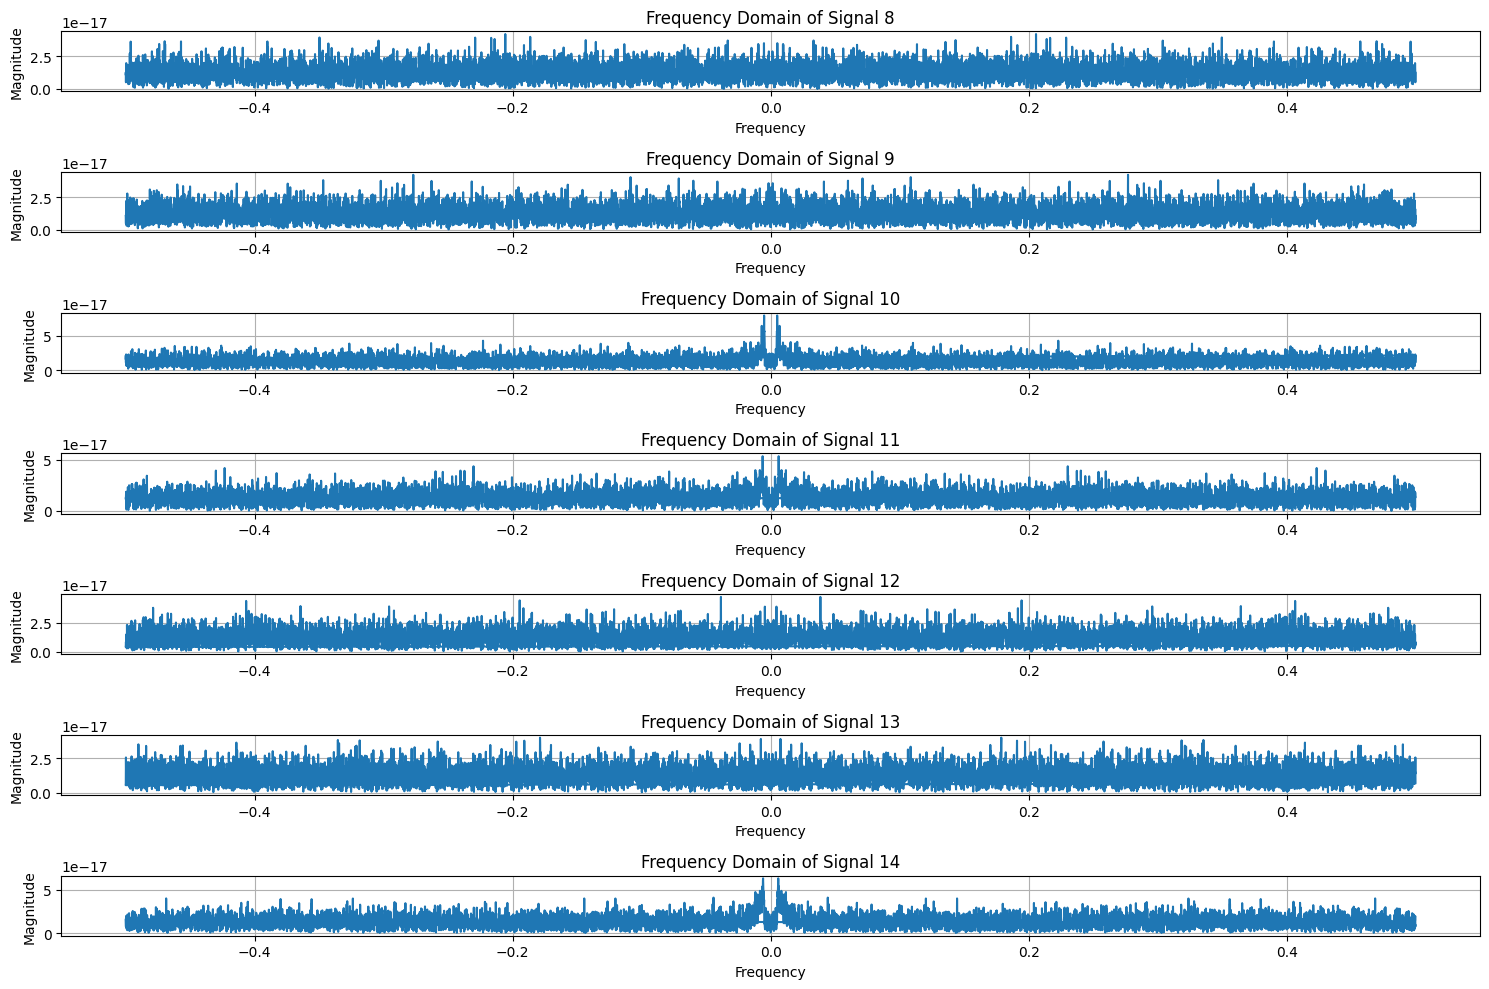

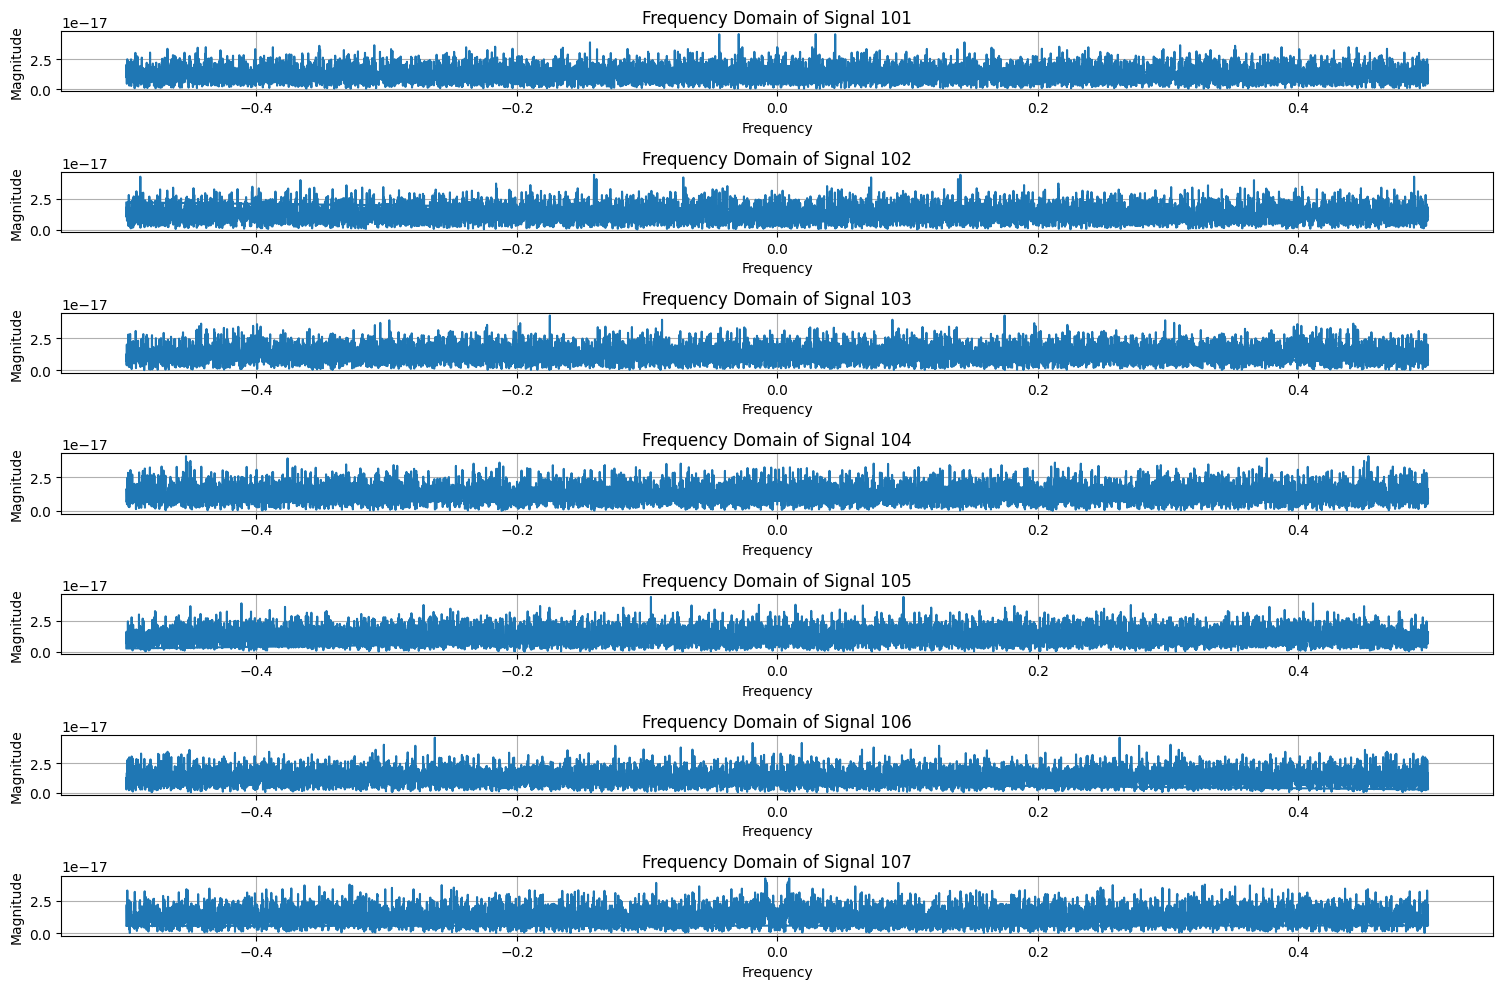

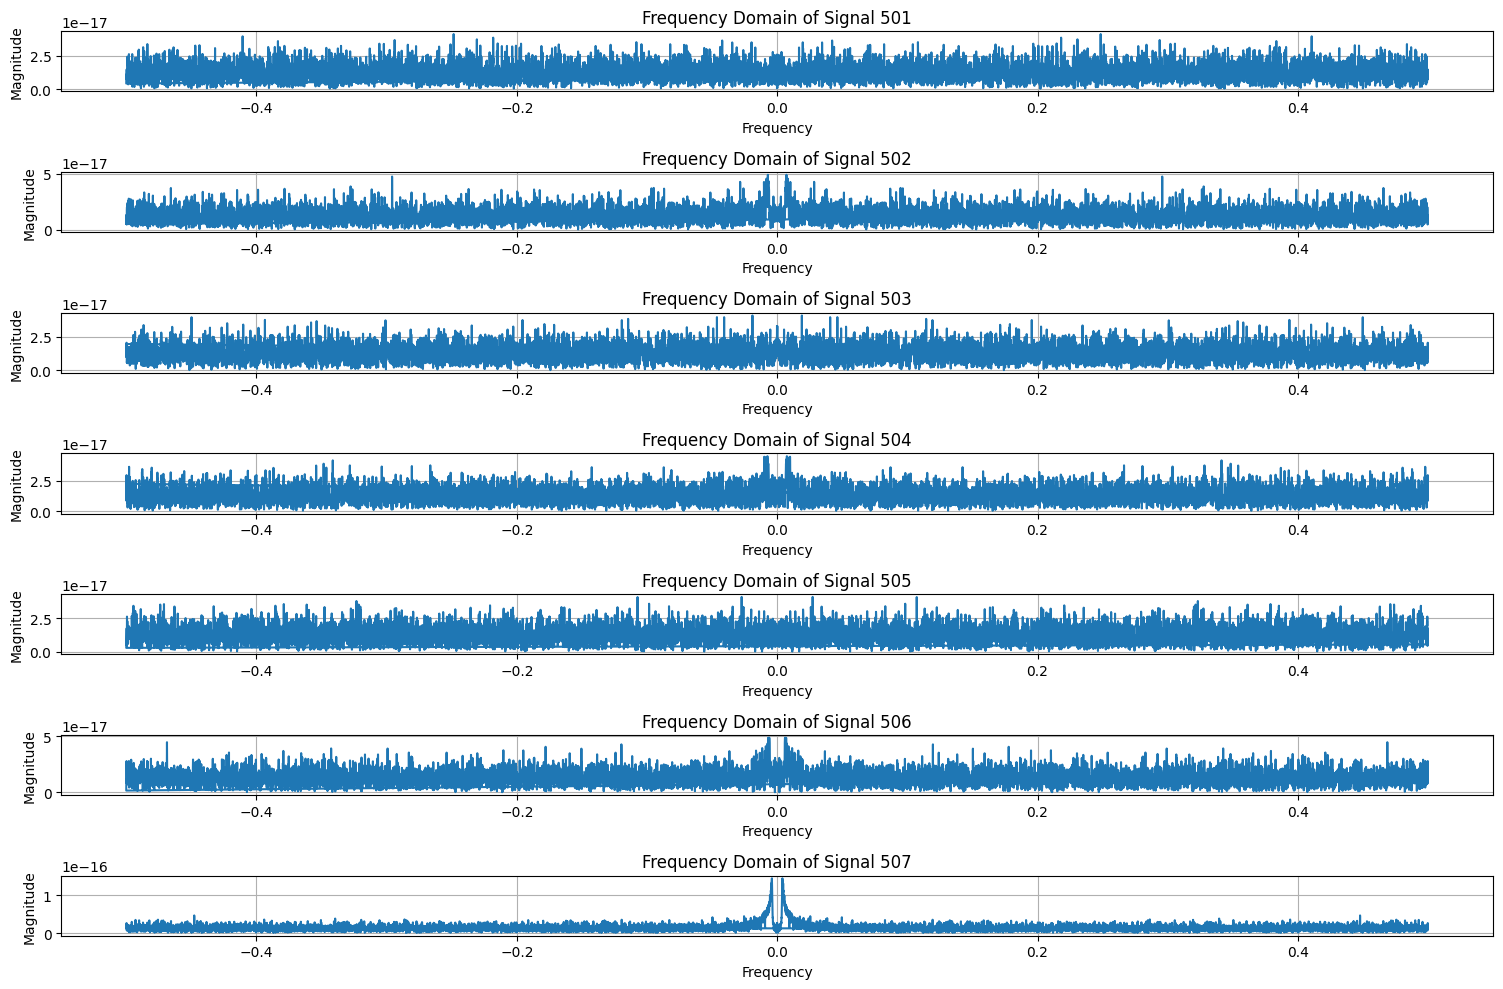

In [139]:
# Function to plot the frequency domain of a range of signals
def plot_frequency_domain(signals, start_idx, end_idx, sampling_rate=1.0):
    plt.figure(figsize=(15, 10))
    
    num_signals = end_idx - start_idx
    for i in range(start_idx, end_idx):
        # Compute the FFT of the signal
        signal_fft = fft(signals[i])
        # Compute the corresponding frequencies
        frequencies = fftfreq(len(signal_fft), d=sampling_rate)
        
        # Plot the magnitude of the FFT
        plt.subplot(num_signals, 1, i - start_idx + 1)
        plt.plot(frequencies, np.abs(signal_fft))
        plt.title(f'Frequency Domain of Signal {i+1}')
        plt.xlabel('Frequency')
        plt.ylabel('Magnitude')
        plt.grid()
    
    plt.tight_layout()
    plt.show()

plot_frequency_domain(datos_np, start_idx=0, end_idx=7, sampling_rate=1.0)
plot_frequency_domain(datos_np, start_idx=7, end_idx=14, sampling_rate=1.0)
#plot_frequency_domain(datos_np, start_idx=14, end_idx=21, sampling_rate=1.0)

plot_frequency_domain(datos_np, start_idx=100, end_idx=107, sampling_rate=1.0)
plot_frequency_domain(datos_np, start_idx=500, end_idx=507, sampling_rate=1.0)
#plot_frequency_domain(datos_np, start_idx=1300, end_idx=1307, sampling_rate=1.0)


In [140]:
# Function to compute the frequency domain of a range of signals
def compute_frequency_domain(signals, start_idx, end_idx, sampling_rate=1.0):
    frequency_domain_data = []
    for i in range(start_idx, end_idx):
        # Compute the FFT of the signal
        signal_fft = fft(signals[i])
        # Compute the corresponding frequencies
        frequencies = fftfreq(len(signal_fft), d=1/sampling_rate)
        # Store frequencies and magnitudes
        frequency_domain_data.append({'Signal': i+1, 'Frequency': frequencies, 'Magnitude': np.abs(signal_fft)})
    return frequency_domain_data

# Example usage: Compute frequency domain for the specified range of signals
frequency_domain_results = compute_frequency_domain(datos_np, start_idx=0, end_idx=len(datos), sampling_rate=1.0)

# Convert the results into a DataFrame
frequency_domain_df = pd.DataFrame(frequency_domain_results)
frequency_domain_df.head()

,Signal,Frequency,Magnitude
0,1,"[0.0, 0.0001150483202945237, 0.000230096640589...","[1.0145092655307018e-17, 1.3742328230303114e-1..."
1,2,"[0.0, 0.0001150483202945237, 0.000230096640589...","[1.2012512630922278e-17, 9.408809696922871e-18..."
2,3,"[0.0, 0.0001150483202945237, 0.000230096640589...","[4.953354143331156e-18, 1.1988600829190209e-17..."
3,4,"[0.0, 0.0001150483202945237, 0.000230096640589...","[8.094916221989224e-18, 9.60860405296951e-18, ..."
4,5,"[0.0, 0.0001150483202945237, 0.000230096640589...","[6.678644534662725e-18, 1.2868479172229612e-17..."


In [141]:

# Function to compute the frequency domain of a range of signals and filter frequencies close to 0
def compute_frequency_domain(signals, start_idx, end_idx, sampling_rate=1.0):
    frequency_domain_data = []
    for i in range(start_idx, end_idx):
        # Compute the FFT of the signal
        signal_fft = fft(signals[i])
        # Compute the corresponding frequencies
        frequencies = fftfreq(len(signal_fft), d=1/sampling_rate)
        # Filter frequencies and magnitudes in the range -0.05 to 0.05
        filtered_indices = np.where((frequencies >= -0.05) & (frequencies <= 0.05))
        filtered_frequencies = frequencies[filtered_indices].tolist()
        filtered_magnitudes = np.abs(signal_fft)[filtered_indices].tolist()
        # Store filtered frequencies and magnitudes
        frequency_domain_data.append({
            'Signal': i+1, 
            'Frequency': filtered_frequencies, 
            'Magnitude': filtered_magnitudes
        })
    return frequency_domain_data

# Example usage: Compute frequency domain for the specified range of signals
frequency_domain_results = compute_frequency_domain(datos_np, start_idx=0, end_idx=len(datos_np), sampling_rate=1.0)

# Convert the results into a DataFrame
frequency_domain_df = pd.DataFrame(frequency_domain_results)
fouriertable = frequency_domain_df.copy()
frequency_domain_df.head()



,Signal,Frequency,Magnitude
0,1,"[0.0, 0.0001150483202945237, 0.000230096640589...","[1.0145092655307018e-17, 1.3742328230303114e-1..."
1,2,"[0.0, 0.0001150483202945237, 0.000230096640589...","[1.2012512630922278e-17, 9.408809696922871e-18..."
2,3,"[0.0, 0.0001150483202945237, 0.000230096640589...","[4.953354143331156e-18, 1.1988600829190209e-17..."
3,4,"[0.0, 0.0001150483202945237, 0.000230096640589...","[8.094916221989224e-18, 9.60860405296951e-18, ..."
4,5,"[0.0, 0.0001150483202945237, 0.000230096640589...","[6.678644534662725e-18, 1.2868479172229612e-17..."


In [142]:
frequency_domain_df_labels = frequency_domain_df.copy()
frequency_domain_df_labels['label'] = labels
frequency_domain_df_labels.head()

# save the data
frequency_domain_df_labels.to_csv('fouriertable.csv', index=False)

### Mapper of Fourier Series (4 clusters)

/Users/pameruiz/anaconda3/envs/tec/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


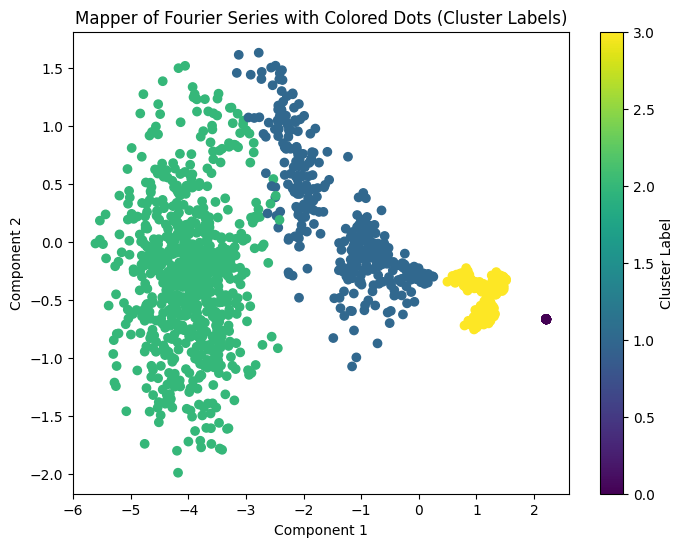

Cluster 0: 62 rows
Cluster 1: 357 rows
Cluster 2: 814 rows
Cluster 3: 267 rows


In [108]:
# Function to create a mapper using t-SNE
def create_mapper(data, perplexity=50, num_components=3):
    tsne = TSNE(n_components=num_components, perplexity=perplexity, random_state=42)
    mapper = tsne.fit_transform(data)
    return mapper

# Extracting magnitudes of Fourier series data
magnitudes = frequency_domain_df['Magnitude'].values


# Reshaping magnitudes to match the expected input shape for t-SNE
reshaped_magnitudes = np.vstack(magnitudes)

# Perform KMeans clustering
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(reshaped_magnitudes)

# Create the mapper
mapper = create_mapper(reshaped_magnitudes, 100, 3)

# Plotting the mapper with colored dots based on cluster labels
plt.figure(figsize=(8, 6))
plt.scatter(mapper[:, 0], mapper[:, 1], c=cluster_labels, cmap='viridis')
plt.colorbar(label='Cluster Label')
plt.title('Mapper of Fourier Series with Colored Dots (Cluster Labels)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


unique_clusters, counts_clusters = np.unique(cluster_labels, return_counts=True)
for cluster, count in zip(unique_clusters, counts_clusters):
    print(f'Cluster {cluster}: {count} rows')

In [109]:
frequency_domain_df['Cluster'] = cluster_labels

# Create a dictionary of DataFrames for each cluster
cluster_dfs = {}
unique_clusters = np.unique(cluster_labels)
for cluster in unique_clusters:
    cluster_dfs[cluster] = frequency_domain_df[frequency_domain_df['Cluster'] == cluster].reset_index(drop=True)

# Print the number of rows in each cluster
for cluster, df in cluster_dfs.items():
    print(f'Cluster {cluster}: {len(df)} rows')



Cluster 0: 62 rows
Cluster 1: 357 rows
Cluster 2: 814 rows
Cluster 3: 267 rows


In [110]:



for i in range(len(cluster_dfs)):
    cluster_df = pd.DataFrame()
    cluster_df = cluster_dfs[i]
    cluster_df = cluster_df.merge(frequency_domain_df_labels, on='Signal', how='left')
    display(cluster_df.head())
    display(cluster_df.describe())



,Signal,Frequency_x,Magnitude_x,Cluster,Frequency_y,Magnitude_y,label
0,1,"[0.0, 0.0001150483202945237, 0.000230096640589...","[1.0145092655307018e-17, 1.3742328230303114e-1...",0,"[0.0, 0.0001150483202945237, 0.000230096640589...","[1.0145092655307018e-17, 1.3742328230303114e-1...",1.0
1,23,"[0.0, 0.0001150483202945237, 0.000230096640589...","[1.1139597308218382e-17, 1.4332319574471678e-1...",0,"[0.0, 0.0001150483202945237, 0.000230096640589...","[1.1139597308218382e-17, 1.4332319574471678e-1...",1.0
2,45,"[0.0, 0.0001150483202945237, 0.000230096640589...","[1.136712820322532e-17, 9.237763399738936e-18,...",0,"[0.0, 0.0001150483202945237, 0.000230096640589...","[1.136712820322532e-17, 9.237763399738936e-18,...",1.0
3,89,"[0.0, 0.0001150483202945237, 0.000230096640589...","[4.910615878540772e-18, 4.648833219262278e-18,...",0,"[0.0, 0.0001150483202945237, 0.000230096640589...","[4.910615878540772e-18, 4.648833219262278e-18,...",1.0
4,155,"[0.0, 0.0001150483202945237, 0.000230096640589...","[2.7214790740101896e-17, 1.1355088480996644e-1...",0,"[0.0, 0.0001150483202945237, 0.000230096640589...","[2.7214790740101896e-17, 1.1355088480996644e-1...",1.0


,Signal,Cluster,label
count,62.000000,62.0,62.0
mean,835.403226,0.0,1.0
std,439.042530,0.0,0.0
min,1.000000,0.0,1.0
25%,479.500000,0.0,1.0
50%,897.500000,0.0,1.0
75%,1213.750000,0.0,1.0
max,1486.000000,0.0,1.0


,Signal,Frequency_x,Magnitude_x,Cluster,Frequency_y,Magnitude_y,label
0,4,"[0.0, 0.0001150483202945237, 0.000230096640589...","[8.094916221989224e-18, 9.60860405296951e-18, ...",1,"[0.0, 0.0001150483202945237, 0.000230096640589...","[8.094916221989224e-18, 9.60860405296951e-18, ...",1.0
1,11,"[0.0, 0.0001150483202945237, 0.000230096640589...","[4.545648315239484e-18, 1.567358827235369e-17,...",1,"[0.0, 0.0001150483202945237, 0.000230096640589...","[4.545648315239484e-18, 1.567358827235369e-17,...",1.0
2,15,"[0.0, 0.0001150483202945237, 0.000230096640589...","[2.4215447495810916e-17, 5.39797613397237e-18,...",1,"[0.0, 0.0001150483202945237, 0.000230096640589...","[2.4215447495810916e-17, 5.39797613397237e-18,...",1.0
3,18,"[0.0, 0.0001150483202945237, 0.000230096640589...","[1.161803323220137e-17, 7.110980587263724e-18,...",1,"[0.0, 0.0001150483202945237, 0.000230096640589...","[1.161803323220137e-17, 7.110980587263724e-18,...",1.0
4,22,"[0.0, 0.0001150483202945237, 0.000230096640589...","[2.992217297686075e-17, 1.0648286455502466e-17...",1,"[0.0, 0.0001150483202945237, 0.000230096640589...","[2.992217297686075e-17, 1.0648286455502466e-17...",1.0


,Signal,Cluster,label
count,357.000000,357.0,357.0
mean,783.941176,1.0,1.0
std,428.859586,0.0,0.0
min,4.000000,1.0,1.0
25%,429.000000,1.0,1.0
50%,796.000000,1.0,1.0
75%,1163.000000,1.0,1.0
max,1500.000000,1.0,1.0


,Signal,Frequency_x,Magnitude_x,Cluster,Frequency_y,Magnitude_y,label
0,3,"[0.0, 0.0001150483202945237, 0.000230096640589...","[4.953354143331156e-18, 1.1988600829190209e-17...",2,"[0.0, 0.0001150483202945237, 0.000230096640589...","[4.953354143331156e-18, 1.1988600829190209e-17...",0.0
1,5,"[0.0, 0.0001150483202945237, 0.000230096640589...","[6.678644534662725e-18, 1.2868479172229612e-17...",2,"[0.0, 0.0001150483202945237, 0.000230096640589...","[6.678644534662725e-18, 1.2868479172229612e-17...",1.0
2,6,"[0.0, 0.0001150483202945237, 0.000230096640589...","[2.0586725324971512e-18, 7.17819098651762e-18,...",2,"[0.0, 0.0001150483202945237, 0.000230096640589...","[2.0586725324971512e-18, 7.17819098651762e-18,...",0.0
3,7,"[0.0, 0.0001150483202945237, 0.000230096640589...","[9.22298364653177e-18, 1.255432211943223e-17, ...",2,"[0.0, 0.0001150483202945237, 0.000230096640589...","[9.22298364653177e-18, 1.255432211943223e-17, ...",0.0
4,8,"[0.0, 0.0001150483202945237, 0.000230096640589...","[6.002914849509402e-18, 4.502962095618806e-18,...",2,"[0.0, 0.0001150483202945237, 0.000230096640589...","[6.002914849509402e-18, 4.502962095618806e-18,...",0.0


,Signal,Cluster,label
count,814.000000,814.0,814.000000
mean,729.485258,2.0,0.087224
std,427.860787,0.0,0.282336
min,3.000000,2.0,0.000000
25%,361.500000,2.0,0.000000
50%,720.500000,2.0,0.000000
75%,1099.500000,2.0,0.000000
max,1497.000000,2.0,1.000000


,Signal,Frequency_x,Magnitude_x,Cluster,Frequency_y,Magnitude_y,label
0,2,"[0.0, 0.0001150483202945237, 0.000230096640589...","[1.2012512630922278e-17, 9.408809696922871e-18...",3,"[0.0, 0.0001150483202945237, 0.000230096640589...","[1.2012512630922278e-17, 9.408809696922871e-18...",1.0
1,10,"[0.0, 0.0001150483202945237, 0.000230096640589...","[1.6816624362593793e-17, 6.785348963623476e-18...",3,"[0.0, 0.0001150483202945237, 0.000230096640589...","[1.6816624362593793e-17, 6.785348963623476e-18...",1.0
2,14,"[0.0, 0.0001150483202945237, 0.000230096640589...","[1.071287149433624e-18, 3.0535442773562494e-18...",3,"[0.0, 0.0001150483202945237, 0.000230096640589...","[1.071287149433624e-18, 3.0535442773562494e-18...",1.0
3,17,"[0.0, 0.0001150483202945237, 0.000230096640589...","[6.185264326444291e-18, 1.3983260828522283e-17...",3,"[0.0, 0.0001150483202945237, 0.000230096640589...","[6.185264326444291e-18, 1.3983260828522283e-17...",1.0
4,32,"[0.0, 0.0001150483202945237, 0.000230096640589...","[3.344372830709856e-17, 2.7388942716809216e-18...",3,"[0.0, 0.0001150483202945237, 0.000230096640589...","[3.344372830709856e-17, 2.7388942716809216e-18...",1.0


,Signal,Cluster,label
count,267.000000,267.0,267.0
mean,750.138577,3.0,1.0
std,450.473835,0.0,0.0
min,2.000000,3.0,1.0
25%,352.500000,3.0,1.0
50%,765.000000,3.0,1.0
75%,1130.500000,3.0,1.0
max,1499.000000,3.0,1.0


Separating in just 2 clusters does not provide a good accuracy rate (50%), the same as a coin toss to decide if it is a wave or noise, however, dividing in 4 clusters provides an improved accuracy. Clusters 0, 1 & 3 are waves, while cluster 2 is mostly noise with a few waves. However, while this proves that the fourier series of the waves is a characteristic that can determine whether a signal is a wave or noise, the method used isn't viable for a classification model since we had to do it manually. The fourier series of the signal could be the input of a CNN to build a good classification model, but we need more characteristics to truly be able to classify as True or False.

In [111]:
# change cluster labels 0, 1, 3 to 1 as they are waves
cluster_labels[(cluster_labels == 0) | (cluster_labels == 1) | (cluster_labels == 3) ] = 1

# change cluster labels 2 to 0 as they are mostly noise
cluster_labels[cluster_labels == 2] = 0

print(cluster_labels)

# Calculate accuracy
accuracy = sum(1 for cl, lb in zip(cluster_labels, labels) if cl == lb) / len(labels)

print(f"Accuracy: {accuracy:.2%}")

[1 1 0 ... 1 1 1]
Accuracy: 95.27%


In [112]:
"""
# ACCURACY DEL MODELO CON SOLO 2 CLUSTERS = 50 %

# ACCURACY DEL MODELO CON 3 CLUSTERS = 74.27%

# change 
cluster_labels[(cluster_labels == 0) | (cluster_labels == 1)] = 1

# change 
cluster_labels[cluster_labels == 2] = 0

print(cluster_labels)

# Calculate accuracy
accuracy = sum(1 for cl, lb in zip(cluster_labels, labels) if cl == lb) / len(labels)

print(f"Accuracy WITH 3 CLUSTERS: {accuracy:.2%}")
"""


'\n# ACCURACY DEL MODELO CON SOLO 2 CLUSTERS = 50 %\n\n# ACCURACY DEL MODELO CON 3 CLUSTERS = 74.27%\n\n# change \ncluster_labels[(cluster_labels == 0) | (cluster_labels == 1)] = 1\n\n# change \ncluster_labels[cluster_labels == 2] = 0\n\nprint(cluster_labels)\n\n# Calculate accuracy\naccuracy = sum(1 for cl, lb in zip(cluster_labels, labels) if cl == lb) / len(labels)\n\nprint(f"Accuracy WITH 3 CLUSTERS: {accuracy:.2%}")\n'

### Mapper (web version)

In [113]:
def create_mapper(data, lens=None, num_intervals=10, overlap_perc=0.1):
    # Initialize a KeplerMapper object
    mapper = km.KeplerMapper()

    # Create a lens using the data (if not provided)
    if lens is None:
        lens = mapper.fit_transform(data)

    # Create a cover
    cover = km.cover.Cover(n_cubes=num_intervals, perc_overlap=overlap_perc)

    # Create the mapper
    graph = mapper.map(lens, data, cover=cover)

    return graph

# Example usage: Create a mapper for the Fourier series data
# Assuming frequency domain data is stored in frequency_domain_df

# Extracting magnitudes of Fourier series data
magnitudes = frequency_domain_df['Magnitude'].values

# Reshaping magnitudes to match the expected input shape for KeplerMapper
reshaped_magnitudes = np.vstack(magnitudes)

# Create the mapper
mapper_graph = create_mapper(reshaped_magnitudes)


In [149]:
def compute_frequency_domain(signals, start_idx, end_idx, sampling_rate=1.0):
    frequency_domain_data = []
    for i in range(start_idx, end_idx):
        # Compute the FFT of the signal
        signal_fft = fft(signals[i])
        # Compute the corresponding frequencies
        frequencies = fftfreq(len(signal_fft), d=1/sampling_rate)
        # Store frequencies and magnitudes
        frequency_domain_data.append({'Signal': i+1, 'Frequency': frequencies, 'Magnitude': np.abs(signal_fft)})
    return frequency_domain_data

# Example usage: Compute frequency domain for the specified range of signals
frequency_domain_results = compute_frequency_domain(datos_np, start_idx=0, end_idx=len(datos_np), sampling_rate=1.0)

# Convert the results into a DataFrame
magnitudes_dataframe = pd.DataFrame(frequency_domain_results)

# Expand the Magnitude column into multiple columns
magnitude_df = pd.DataFrame(magnitudes_dataframe['Magnitude'].tolist(), index=magnitudes_dataframe.index)

magnitude_df.head()

# save magnitudes dataframe
magnitude_df.to_csv('magnitude_df.csv', index=False)

In [115]:
# Use PCA to reduce the dimensionality of the magnitudes
pca = PCA(n_components=2)
pca_magnitudes = pca.fit_transform(magnitude_df)


# Create numpy array from magnitude_df
x = magnitude_df.to_numpy()
x = pca_magnitudes

In [116]:
mapper = km.KeplerMapper(verbose=1)
projected_data = mapper.fit_transform(x, projection=[0,1]
                                      ) 

KeplerMapper(verbose=1)
..Composing projection pipeline of length 1:
	Projections: [0, 1]
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (1500, 2)

..Projecting data using: [0, 1]

..Scaling with: MinMaxScaler()



In [117]:
covering=km.Cover(n_cubes=3,perc_overlap=0.3)
covering


#covering=km.Cover(n_cubes=3,perc_overlap=0.1)



Cover(n_cubes=3, perc_overlap=0.3, limits=None, verbose=0)

In [118]:
G = mapper.map(projected_data, x, clusterer=KMeans(n_clusters=2),cover=covering)

Mapping on data shaped (1500, 2) using lens shaped (1500, 2)

Creating 9 hypercubes.

Created 13 edges and 12 nodes in 0:00:00.220457.


/Users/pameruiz/anaconda3/envs/tec/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/pameruiz/anaconda3/envs/tec/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/pameruiz/anaconda3/envs/tec/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/pameruiz/anaconda3/envs/tec/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: 

In [119]:
mapper.visualize(G, 
                title='Example 1 of Mapper on the Sphere dataset',
                #custom_tooltips = performance_data['gender'].to_numpy(),
                color_values = frequency_domain_df_labels['label'],
                color_function_name = 'Height of the point',
                node_color_function=np.array(['average','std','sum','max','min']))


Wrote visualization to: mapper_visualization_output.html


'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>Example 1 of Mapper on the Sphere dataset | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;\n}\n\nh4 {\n  fo

### Mapper only 3 Kmeans (maintains accuracy)

We managed to decrease the number of clusters it takes to classify correctly maintaining the same accuracy.


/Users/pameruiz/anaconda3/envs/tec/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.1769690256309036


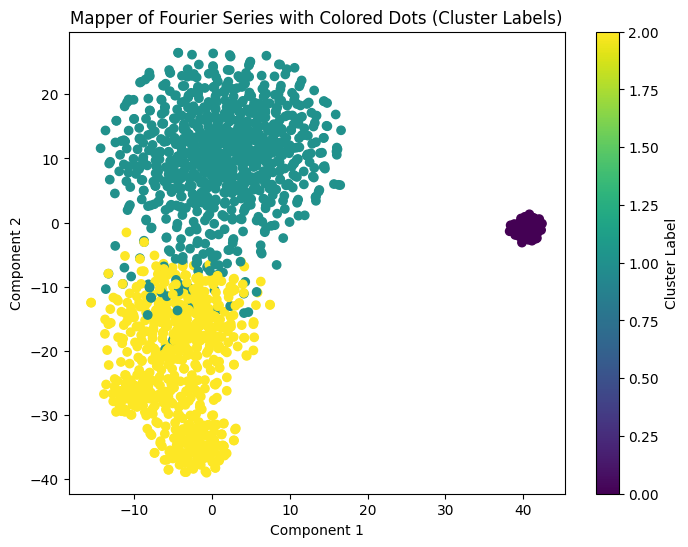

Cluster 0: 62 rows
Cluster 1: 845 rows
Cluster 2: 593 rows


In [145]:


# Function to compute the frequency domain of a range of signals and filter frequencies close to 0
def compute_frequency_domain(signals, start_idx, end_idx, sampling_rate=1.0):
    frequency_domain_data = []
    for i in range(start_idx, end_idx):
        # Compute the FFT of the signal
        signal_fft = fft(signals[i])
        # Compute the corresponding frequencies
        frequencies = fftfreq(len(signal_fft), d=1/sampling_rate)
        # Filter frequencies and magnitudes in the range -0.05 to 0.05
        filtered_indices = np.where((frequencies >= -0.05) & (frequencies <= 0.05))
        filtered_frequencies = frequencies[filtered_indices].tolist()
        filtered_magnitudes = np.abs(signal_fft)[filtered_indices].tolist()
        # Store filtered frequencies and magnitudes
        frequency_domain_data.append({
            'Signal': i+1, 
            'Frequencies': filtered_frequencies, 
            'Magnitudes': filtered_magnitudes
        })
    return frequency_domain_data

# Example usage: Compute frequency domain for the specified range of signals
frequency_domain_results = compute_frequency_domain(datos_np, start_idx=0, end_idx=len(datos_np), sampling_rate=1.0)

# Convert the results into a DataFrame
frequency_domain_df = pd.DataFrame(frequency_domain_results)

# Extracting magnitudes of Fourier series data
magnitudes = frequency_domain_df['Magnitudes'].values


# Save magnitudes in np
np.save('fourier_magnitudes.npy', magnitudes, allow_pickle=True)


# Reshaping magnitudes to match the expected input shape for t-SNE
reshaped_magnitudes = np.vstack(magnitudes)

# Normalize the data
scaler = StandardScaler()
normalized_magnitudes = scaler.fit_transform(reshaped_magnitudes)

# Optionally apply PCA before t-SNE
pca = PCA(n_components=50)
pca_result = pca.fit_transform(normalized_magnitudes)

# Function to create a mapper using t-SNE
def create_mapper(data, perplexity=30, num_components=2):
    tsne = TSNE(n_components=num_components, perplexity=perplexity, random_state=42)
    mapper = tsne.fit_transform(data)
    return mapper


# Save pca_result for later use
np.save('pca_result.npy', pca_result)


# Create the mapper
mapper = create_mapper(pca_result)



# Perform KMeans clustering
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(pca_result)

# Evaluate clustering with silhouette score
sil_score = silhouette_score(pca_result, cluster_labels)
print(f'Silhouette Score: {sil_score}')

# Plotting the mapper with colored dots based on cluster labels
plt.figure(figsize=(8, 6))
plt.scatter(mapper[:, 0], mapper[:, 1], c=cluster_labels, cmap='viridis')
plt.colorbar(label='Cluster Label')
plt.title('Mapper of Fourier Series with Colored Dots (Cluster Labels)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

# Add cluster labels to the original DataFrame
frequency_domain_df['Cluster'] = cluster_labels

# Create a dictionary of DataFrames for each cluster
cluster_dfs = {}
unique_clusters = np.unique(cluster_labels)
for cluster in unique_clusters:
    cluster_dfs[cluster] = frequency_domain_df[frequency_domain_df['Cluster'] == cluster].reset_index(drop=True)

# Print the number of rows in each cluster
for cluster, df in cluster_dfs.items():
    print(f'Cluster {cluster}: {len(df)} rows')




In [146]:
magnitudes

array([list([1.0145092655307018e-17, 1.3742328230303114e-17, 1.4717991549148295e-17, 8.856003998768242e-18, 4.394898970136784e-18, 7.308886559013291e-18, 2.866928049416837e-18, 1.2919044833551195e-17, 1.6419989379651357e-17, 9.652550677980088e-18, 7.033324631549612e-18, 8.25500870462153e-18, 1.0762545074391769e-17, 1.6399790943310697e-17, 9.80314628959949e-18, 1.0411223713190204e-17, 3.914260191906404e-18, 7.951155237703286e-18, 1.1484081969309883e-17, 7.081518625768035e-18, 1.5663892940210445e-17, 7.63650041772461e-18, 2.2238072911136795e-17, 7.84480336100825e-18, 1.9324990602761367e-17, 2.1103102175654985e-17, 1.509596240444683e-17, 1.507125733314264e-17, 2.119590417732743e-17, 3.395374142669374e-17, 5.945762394151302e-17, 5.976972196151095e-17, 7.52368060927145e-17, 9.563649123322962e-17, 1.220839114294249e-16, 1.5165465185435853e-16, 1.4061464625554254e-16, 1.375052931678127e-16, 1.0030214833676629e-16, 1.210182485358361e-16, 1.223130452757477e-16, 9.747561415427336e-17, 9.89754728

In [134]:

# Merge the correct labels with cluster 0 DataFrame
cluster_0_df = cluster_dfs[0]
cluster_0_df = cluster_0_df.merge(frequency_domain_df_labels, on='Signal', how='left')

cluster_0_df.describe()

,Signal,Cluster,label
count,62.000000,62.0,62.0
mean,835.403226,0.0,1.0
std,439.042530,0.0,0.0
min,1.000000,0.0,1.0
25%,479.500000,0.0,1.0
50%,897.500000,0.0,1.0
75%,1213.750000,0.0,1.0
max,1486.000000,0.0,1.0


In [135]:

frequency_domain_df['Cluster'] = cluster_labels

# Create a dictionary of DataFrames for each cluster
cluster_dfs = {}
unique_clusters = np.unique(cluster_labels)
for cluster in unique_clusters:
    cluster_dfs[cluster] = frequency_domain_df[frequency_domain_df['Cluster'] == cluster].reset_index(drop=True)

# Print the number of rows in each cluster
for cluster, df in cluster_dfs.items():
    print(f'Cluster {cluster}: {len(df)} rows')


for i in range(len(cluster_dfs)):
    cluster_df = pd.DataFrame()
    cluster_df = cluster_dfs[i]
    cluster_df = cluster_df.merge(frequency_domain_df_labels, on='Signal', how='left')
    display(cluster_df.head())
    display(cluster_df.describe())



Cluster 0: 62 rows
Cluster 1: 593 rows
Cluster 2: 845 rows


,Signal,Frequencies,Magnitudes,Cluster,Frequency,Magnitude,label
0,1,"[0.0, 0.0001150483202945237, 0.000230096640589...","[1.0145092655307018e-17, 1.3742328230303114e-1...",0,"[0.0, 0.0001150483202945237, 0.000230096640589...","[1.0145092655307018e-17, 1.3742328230303114e-1...",1.0
1,23,"[0.0, 0.0001150483202945237, 0.000230096640589...","[1.1139597308218382e-17, 1.4332319574471678e-1...",0,"[0.0, 0.0001150483202945237, 0.000230096640589...","[1.1139597308218382e-17, 1.4332319574471678e-1...",1.0
2,45,"[0.0, 0.0001150483202945237, 0.000230096640589...","[1.136712820322532e-17, 9.237763399738936e-18,...",0,"[0.0, 0.0001150483202945237, 0.000230096640589...","[1.136712820322532e-17, 9.237763399738936e-18,...",1.0
3,89,"[0.0, 0.0001150483202945237, 0.000230096640589...","[4.910615878540772e-18, 4.648833219262278e-18,...",0,"[0.0, 0.0001150483202945237, 0.000230096640589...","[4.910615878540772e-18, 4.648833219262278e-18,...",1.0
4,155,"[0.0, 0.0001150483202945237, 0.000230096640589...","[2.7214790740101896e-17, 1.1355088480996644e-1...",0,"[0.0, 0.0001150483202945237, 0.000230096640589...","[2.7214790740101896e-17, 1.1355088480996644e-1...",1.0


,Signal,Cluster,label
count,62.000000,62.0,62.0
mean,835.403226,0.0,1.0
std,439.042530,0.0,0.0
min,1.000000,0.0,1.0
25%,479.500000,0.0,1.0
50%,897.500000,0.0,1.0
75%,1213.750000,0.0,1.0
max,1486.000000,0.0,1.0


,Signal,Frequencies,Magnitudes,Cluster,Frequency,Magnitude,label
0,2,"[0.0, 0.0001150483202945237, 0.000230096640589...","[1.2012512630922278e-17, 9.408809696922871e-18...",1,"[0.0, 0.0001150483202945237, 0.000230096640589...","[1.2012512630922278e-17, 9.408809696922871e-18...",1.0
1,4,"[0.0, 0.0001150483202945237, 0.000230096640589...","[8.094916221989224e-18, 9.60860405296951e-18, ...",1,"[0.0, 0.0001150483202945237, 0.000230096640589...","[8.094916221989224e-18, 9.60860405296951e-18, ...",1.0
2,10,"[0.0, 0.0001150483202945237, 0.000230096640589...","[1.6816624362593793e-17, 6.785348963623476e-18...",1,"[0.0, 0.0001150483202945237, 0.000230096640589...","[1.6816624362593793e-17, 6.785348963623476e-18...",1.0
3,11,"[0.0, 0.0001150483202945237, 0.000230096640589...","[4.545648315239484e-18, 1.567358827235369e-17,...",1,"[0.0, 0.0001150483202945237, 0.000230096640589...","[4.545648315239484e-18, 1.567358827235369e-17,...",1.0
4,14,"[0.0, 0.0001150483202945237, 0.000230096640589...","[1.071287149433624e-18, 3.0535442773562494e-18...",1,"[0.0, 0.0001150483202945237, 0.000230096640589...","[1.071287149433624e-18, 3.0535442773562494e-18...",1.0


,Signal,Cluster,label
count,593.000000,593.0,593.0
mean,776.662732,1.0,1.0
std,437.832384,0.0,0.0
min,2.000000,1.0,1.0
25%,391.000000,1.0,1.0
50%,796.000000,1.0,1.0
75%,1165.000000,1.0,1.0
max,1500.000000,1.0,1.0


,Signal,Frequencies,Magnitudes,Cluster,Frequency,Magnitude,label
0,3,"[0.0, 0.0001150483202945237, 0.000230096640589...","[4.953354143331156e-18, 1.1988600829190209e-17...",2,"[0.0, 0.0001150483202945237, 0.000230096640589...","[4.953354143331156e-18, 1.1988600829190209e-17...",0.0
1,5,"[0.0, 0.0001150483202945237, 0.000230096640589...","[6.678644534662725e-18, 1.2868479172229612e-17...",2,"[0.0, 0.0001150483202945237, 0.000230096640589...","[6.678644534662725e-18, 1.2868479172229612e-17...",1.0
2,6,"[0.0, 0.0001150483202945237, 0.000230096640589...","[2.0586725324971512e-18, 7.17819098651762e-18,...",2,"[0.0, 0.0001150483202945237, 0.000230096640589...","[2.0586725324971512e-18, 7.17819098651762e-18,...",0.0
3,7,"[0.0, 0.0001150483202945237, 0.000230096640589...","[9.22298364653177e-18, 1.255432211943223e-17, ...",2,"[0.0, 0.0001150483202945237, 0.000230096640589...","[9.22298364653177e-18, 1.255432211943223e-17, ...",0.0
4,8,"[0.0, 0.0001150483202945237, 0.000230096640589...","[6.002914849509402e-18, 4.502962095618806e-18,...",2,"[0.0, 0.0001150483202945237, 0.000230096640589...","[6.002914849509402e-18, 4.502962095618806e-18,...",0.0


,Signal,Cluster,label
count,845.000000,845.0,845.000000
mean,725.910059,2.0,0.120710
std,428.049557,0.0,0.325983
min,3.000000,2.0,0.000000
25%,358.000000,2.0,0.000000
50%,718.000000,2.0,0.000000
75%,1094.000000,2.0,0.000000
max,1497.000000,2.0,1.000000


In [136]:
# change cluster labels 0, 1 to 1 as they are waves
cluster_labels[(cluster_labels == 0) | (cluster_labels == 1) ] = 1

# change cluster labels 2 to 0 as they are mostly noise
cluster_labels[cluster_labels == 2] = 0

print(cluster_labels)

# Calculate accuracy
accuracy = sum(1 for cl, lb in zip(cluster_labels, labels) if cl == lb) / len(labels)

print(f"Accuracy: {accuracy:.2%}")

[1 1 0 ... 1 1 1]
Accuracy: 93.20%
